# Iris Data Set

### 1. Iris flower data set

"The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.[1] It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species.[2] Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".[3]

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other."

[1]R. A. Fisher (1936). "The use of multiple measurements in taxonomic problems". Annals of Eugenics. 7 (2): 179–188. doi:10.1111/j.1469-1809.1936.tb02137.x.

[2]Edgar Anderson (1936). "The species problem in Iris". Annals of the Missouri Botanical Garden. 23 (3): 457–509. JSTOR 2394164.

[3]Edgar Anderson (1935). "The irises of the Gaspé Peninsula". Bulletin of the American Iris Society. 59: 2–5.

From Wikipedia, the free encyclopedia

The Iris data set is it also well known to be used in pattern recognition and it is widely used to get started in machine learning.


In [1]:
import numpy as np
import matplotlib.pyplot as pl

# This just sets the default plot size to be bigger.
pl.rcParams['figure.figsize'] = (16.0, 8.0)

Small excerpt of the csv as example:

| SepalLengthCm  | SepalWidthCm |  PetalLengthCm   | PetalWidthCm |      Species|
|:-----------:   |:------------:|: ---------------:|:------------:|:-----------:|
|            5.1 |	         3.5|	            1.4|	       0.2|       setosa|
|            4.9 |	           3|	            1.4|	       0.2|       setosa|
|            4.7 |	         3.2|	            1.3|	       0.2|       setosa|
|            4.6 |	         3.1|	            1.5|	       0.2|   	  setosa|


In [2]:
# Read data from csv file
iris_data = np.genfromtxt('data/iris-data-set.csv', dtype=str, delimiter=',')
s_len, s_width, p_len, p_width, species = iris_data.transpose()

# Convert data to float
s_len = s_len.astype(np.float)
s_width = s_width.astype(np.float)
p_len = p_len.astype(np.float)
p_width = p_width.astype(np.float)

### 2. Creating a simple plot

Use pyplot to create a scatter plot of sepal length on the x-axis versus sepal width on the y-axis. Add axis labels and a title to the plot.

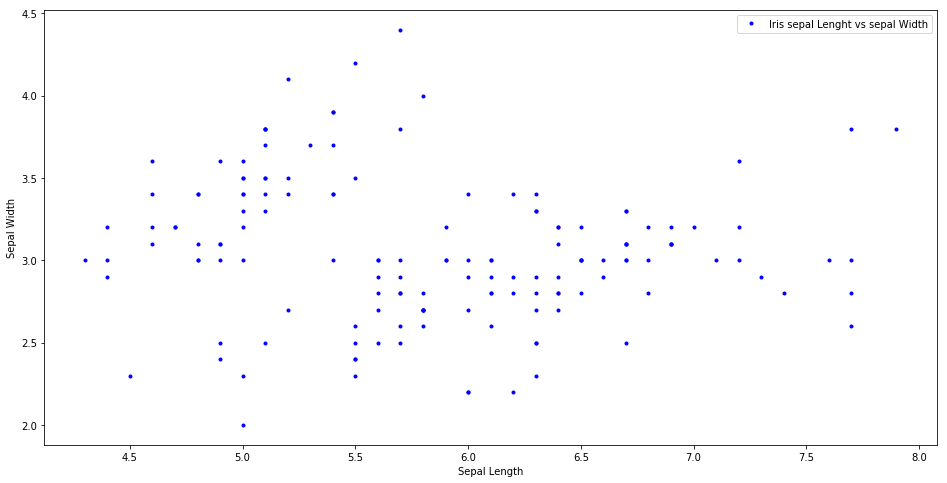

In [3]:
# Plot the data
pl.plot(s_len, s_width, 'b.', label='Iris sepal Lenght vs sepal Width')
pl.ylabel("Sepal Width")
pl.xlabel("Sepal Length")
pl.legend()
pl.show()


### 3. Creating a more complex plot

Re-create the above plot, but this time plot the setosa data points in red, the versicolor data point in green, and the virginica data points in blue. Setosa, versicolor, and virginica are the three possible values of the species variable. Add a legend to the plot showing which species is in which colour.

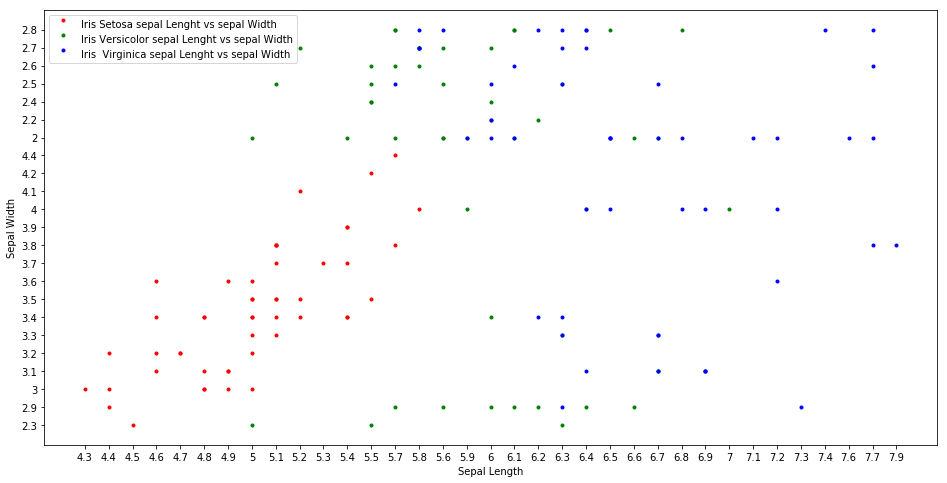

In [4]:
# Splitting data set into species
setosa, versicolor, virginica = [],[],[]
for iris in iris_data:
    if (iris[4] == "setosa"):
        setosa.append(iris)
    elif (iris[4] == "versicolor"):
        versicolor.append(iris)
    elif (iris[4] == "virginica"):
        virginica.append(iris)

# Converting data into a more suitable array using numpy
setosa = np.array(setosa)
versicolor = np.array(versicolor)
virginica = np.array(virginica)

# Setosa
ssl , ssw, spl, spw, slabel = setosa.transpose()
# Versicolor
vesl , vesw, vepl, vepw, velabel = versicolor.transpose()
# Virginica
visl , visw, vipl, vipw, vilabel = virginica.transpose()

# Plot the data
pl.plot(ssl, ssw, 'r.', label='Iris Setosa sepal Lenght vs sepal Width')
pl.plot(vesl, vesw, 'g.', label='Iris Versicolor sepal Lenght vs sepal Width')
pl.plot(visl, visw, 'b.', label='Iris  Virginica sepal Lenght vs sepal Width')
pl.ylabel("Sepal Width")
pl.xlabel("Sepal Length")
pl.legend()
pl.show()

### 4. Using seaborn

Use the seaborn library to create a scatterplot matrix of all five variables.

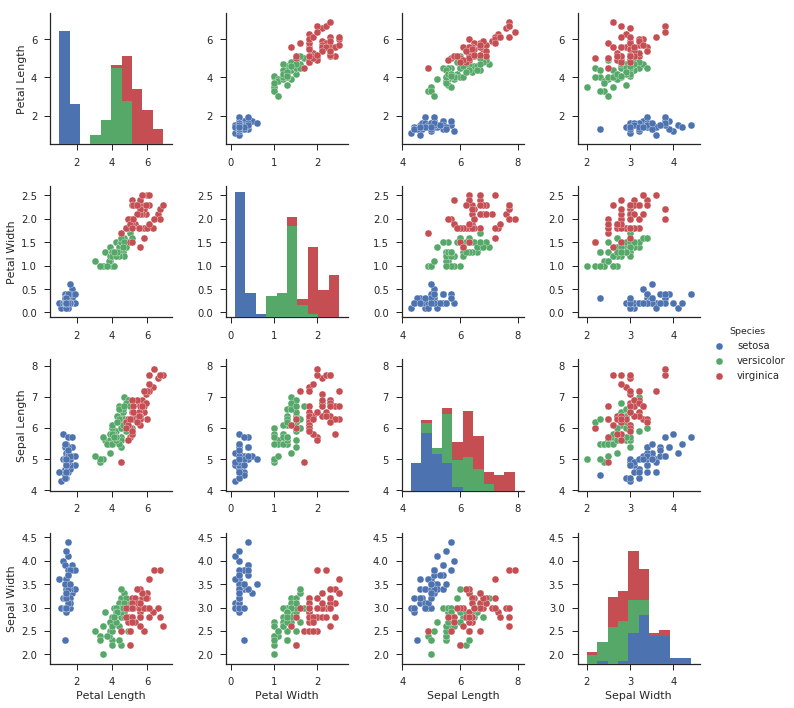

In [5]:
%matplotlib inline

import seaborn as sns
import pandas as pd

sns.set(style="ticks")

iris_df = pd.DataFrame(dict(zip(['Sepal Length', 'Sepal Width','Petal Length', 'Petal Width', 'Species'], 
                           [s_len, s_width, p_len, p_width, species])))

sns.pairplot(iris_df, hue="Species")


### 5. Fitting  a line

Fit a straight line to the variables petal length and petal width for the whole data set. Plot the data points in a scatter plot with the best fit line shown.

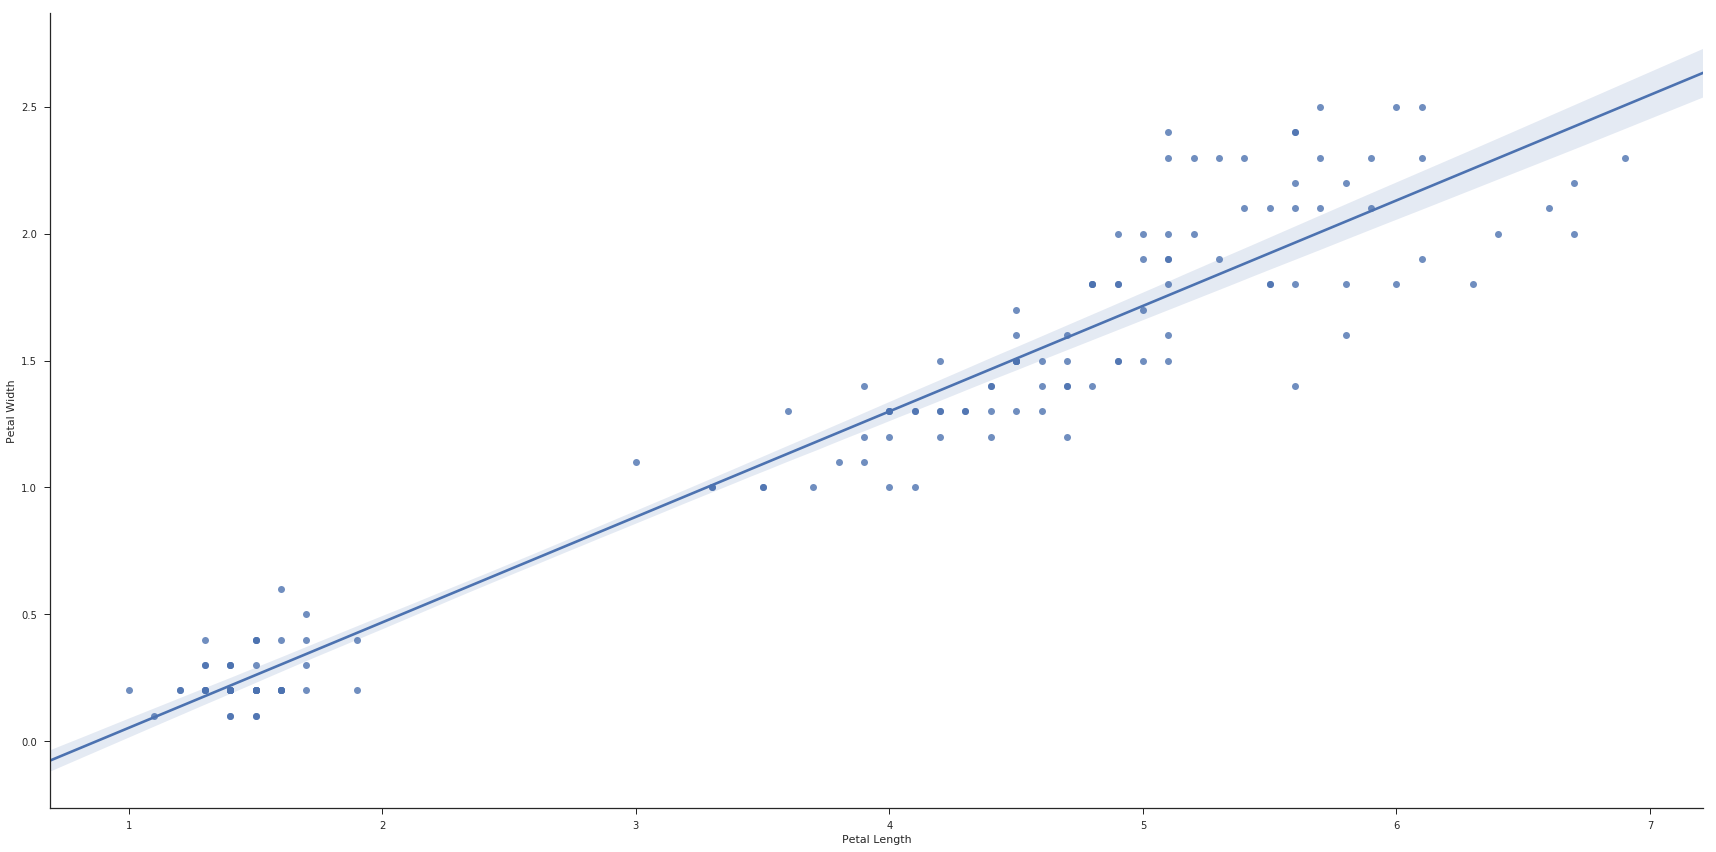

In [6]:
# Using Seaborn to calculate best fit line by using lmplot()
sepal_df = pd.DataFrame(dict(zip(['Petal Length', 'Petal Width'], [p_len, p_width])))
sns.lmplot(x="Petal Length", y="Petal Width", data=sepal_df, size=12,aspect=2)

### 6. Calculating the R-squared value

Calculate the R-squared value for your line above.


In [7]:
# R^2 (coefficient of determination) by using both scipy stats and numpy corrcoef
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(p_len,p_width)
print("Using scipy:", r_value**2)
# Using numpy's corrcoef to calculate R^2
print("Using numpy:", np.corrcoef(p_len,p_width)[0, 1]**2)

Using scipy: 0.92710983899
Using numpy: 0.92710983899


### 7. Fit another line

Use numpy to select only the data points where species is setosa. Fit a straight line to the variables petal length and petal width. Plot the data points in a scatter plot with the best fit line shown.

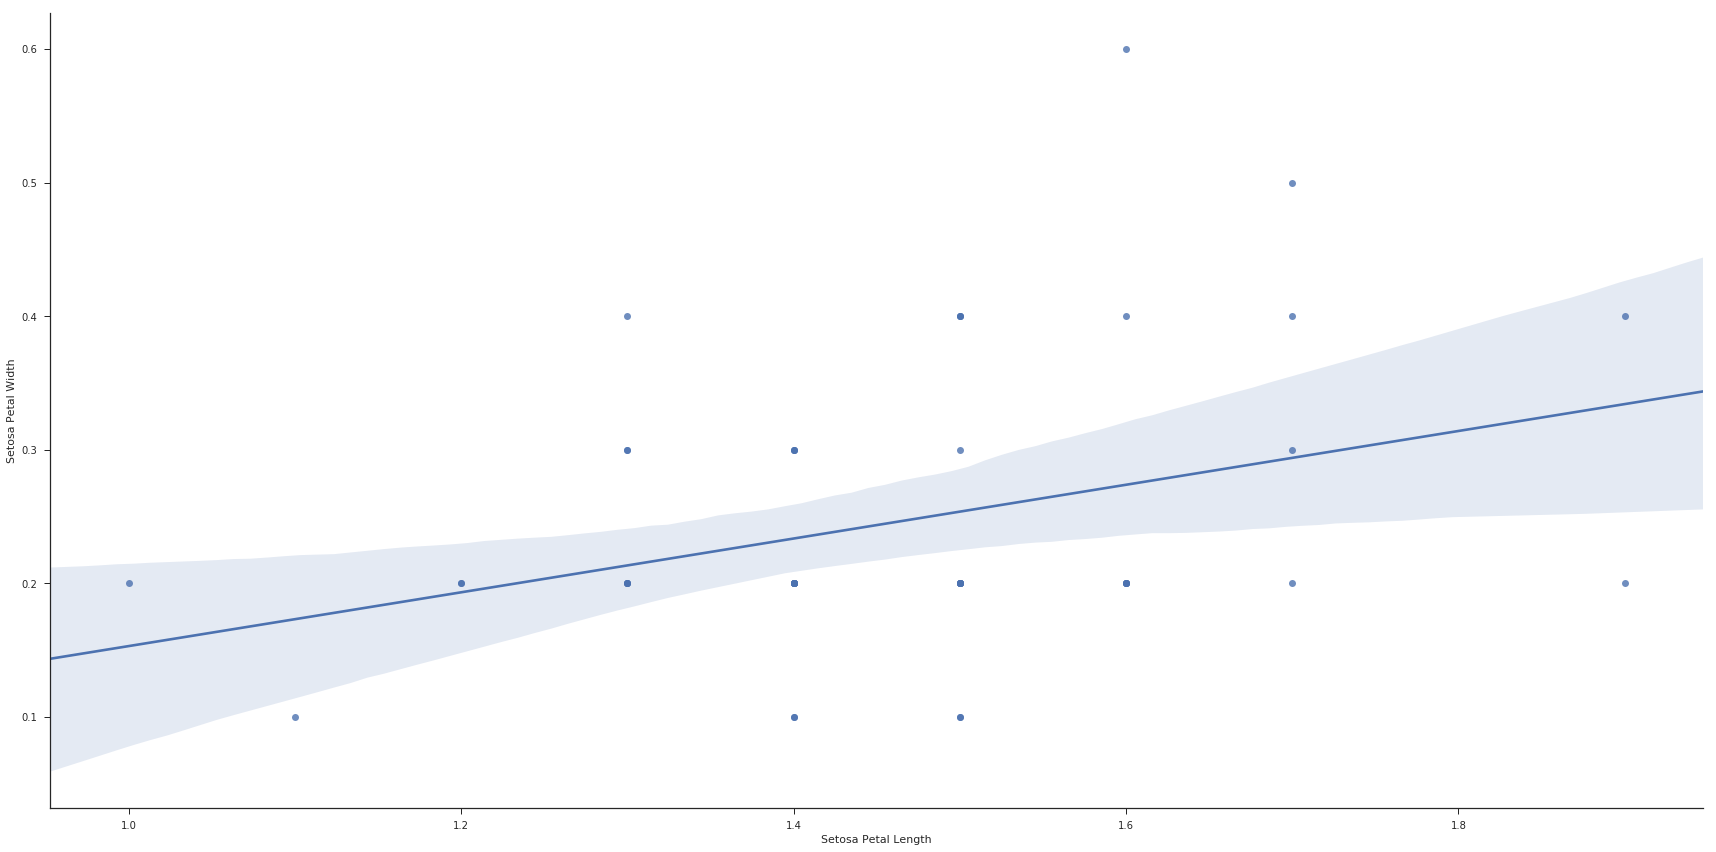

In [8]:
# Using Seaborn to calculate best fit line by using lmplot() 
# Data has been already extrapolated in point 3 (spl and spw)
setosa_df = pd.DataFrame(dict(zip(['Setosa Petal Length', 'Setosa Petal Width'], [spl.astype(np.float), spw.astype(np.float)])))
sns.lmplot(x='Setosa Petal Length', y='Setosa Petal Width', data=setosa_df, size=12,aspect=2)

### 8. Calculate the R-squared value

Calculate the R-squared value for your line above.

In [9]:
# Using scipy to extrapolate and calculate R^2
slope, intercept, r_value, p_value, std_err = stats.linregress(spl.astype(np.float),spw.astype(np.float))
print("Using scipy:", r_value**2)
# Using numpy's corrcoef to calculate R^2
print("Using numpy:", np.corrcoef(spl.astype(np.float),spw.astype(np.float))[0, 1]**2)

Using scipy: 0.109978483964
Using numpy: 0.109978483964


### 9. Use gradient descent

Use gradient descent to approximate the best fit line for the petal length and petal width setosa values. Compare the outputs to your calculations above.

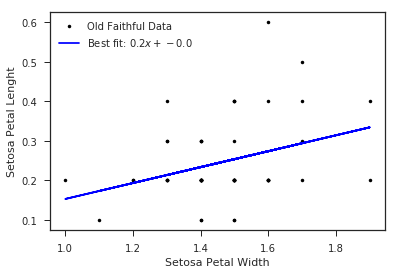

In [10]:
# Source: https://emerging-technologies.github.io/notebooks/gradient-descent.ipynb

def grad_m(x, y, m, c):
  return -2.0 * np.sum(x * (y - m * x - c))

def grad_c(x, y, m , c):
  return -2.0 * np.sum(y - m * x - c)

spl = spl.astype(np.float)
spw = spw.astype(np.float)

eta = 0.0001
m, c = 1.0, 1.0
change = True

while change:
  mnew = m - eta * grad_m(spl, spw, m, c)
  cnew = c - eta * grad_c(spl, spw, m, c)
  if m == mnew and c == cnew:
    change = False
  else:
    m, c = mnew, cnew

# Plot the data
pl.plot(spl, spw, 'k.', label='Old Faithful Data')
pl.plot(spl, m * spl + c, 'b-', label='Best fit: $%0.1f x + %0.1f$' % (m,c))
pl.ylabel("Setosa Petal Lenght")
pl.xlabel("Setosa Petal Width")
pl.legend()
pl.show()